In [6]:
from keras.datasets import imdb
from keras.layers import Embedding, LSTM, Dense
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

'''
サンプルデータの生成
'''
max_features = 15000        # 特徴量として考慮する単語の数
max_len = 4000               # この数の単語だけを残してテキストをカット
batch_size = 32

print("Loading data ...")
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), "train sequence")
print(len(input_test), " test sequence")

print("Pad sequence (samples x times)")
input_train = sequence.pad_sequences(input_train, maxlen=max_len)
input_test = sequence.pad_sequences(input_test, maxlen=max_len)
print("input_train shape : ", input_train.shape)
print("input_test shaape : ", input_test.shape)


Loading data ...
25000 train sequence
25000  test sequence
Pad sequence (samples x times)
input_train shape :  (25000, 4000)
input_test shaape :  (25000, 4000)


In [0]:
'''
モデルの構築
'''
early_stopping = EarlyStopping(monitor= "val_loss", patience= 10, verbose= 1)
variance_vector_dim = 16        # 分散ベクトルの次元

model = Sequential()
model.add(Embedding(max_features, variance_vector_dim))
model.add(LSTM(16))
model.add(Dense(1, activation="sigmoid"))
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["acc"]
)

In [8]:
'''
学習
'''
history = model.fit(
    input_train, y_train,
    epochs=30,
    batch_size=2500,
    validation_split=0.2,
    callbacks=[early_stopping]
)


Train on 20000 samples, validate on 5000 samples
Epoch 1/30
20000/20000 [==============================] - 42s 2ms/step - loss: 0.6920 - acc: 0.5608 - val_loss: 0.6903 - val_acc: 0.6194
Epoch 2/30
20000/20000 [==============================] - 43s 2ms/step - loss: 0.6867 - acc: 0.6801 - val_loss: 0.6846 - val_acc: 0.6600
Epoch 3/30
20000/20000 [==============================] - 42s 2ms/step - loss: 0.6764 - acc: 0.7309 - val_loss: 0.6700 - val_acc: 0.6946
Epoch 4/30
20000/20000 [==============================] - 43s 2ms/step - loss: 0.6397 - acc: 0.7129 - val_loss: 0.6036 - val_acc: 0.7426
Epoch 5/30
20000/20000 [==============================] - 43s 2ms/step - loss: 0.5866 - acc: 0.7571 - val_loss: 0.5695 - val_acc: 0.7788
Epoch 6/30
20000/20000 [==============================] - 43s 2ms/step - loss: 0.5449 - acc: 0.7875 - val_loss: 0.5252 - val_acc: 0.7854
Epoch 7/30
20000/20000 [==============================] - 42s 2ms/step - loss: 0.5110 - acc: 0.8039 - val_loss: 0.5259 - val_acc:

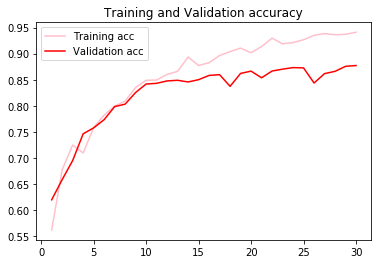

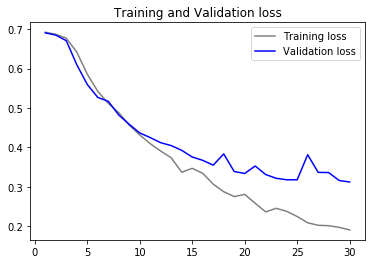

In [0]:
''''
評価
'''
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, label="Training acc", color= "pink")
plt.plot(epochs, val_acc, label="Validation acc", color= "red")
plt.title("Training and Validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, label="Training loss", color= "gray")
plt.plot(epochs, val_loss, label="Validation loss", color= "blue")
plt.title("Training and Validation loss")
plt.legend()

plt.show()